In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [3]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
f_len = len(features)

In [4]:
#Это мой вариант считывания данных, ниже находится аналогичный предыдущим лабам
data = pd.read_excel('лаба.xlsx', sheet_name='исходные данные', index_col=0).iloc[:, :-6]
data.columns = features
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Субъект Российской Федерации,,,,,,,,,,
Алтайский край,1166,17.6,5.8,23937,-18.0,1.38,4.64,0.60,4.26,0.42
Амурская область,1109,15.7,7.1,33304,0.2,2.50,9.16,0.82,4.15,0.51
Архангельская область,1132,13.6,6.1,35693,-26.0,0.76,4.79,0.73,3.65,0.78
Астраханская область,1122,15.5,5.8,24971,-78.0,1.33,3.90,0.77,2.58,0.84
Белгородская область,1163,7.8,6.7,32352,60.0,0.69,2.61,0.31,1.47,0.47


In [5]:
# подставь свои значения!
# data = pd.read_excel("data.xlsx", sheet_name="sheet_name", index_col=0).loc[:, features]
# data.columns=features
# data.head()

In [6]:
#стандартизация
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Субъект Российской Федерации,,,,,,,,,,
Алтайский край,0.480197,0.654258,-0.517762,-0.593885,-0.468984,0.188463,0.058932,-0.337127,1.090805,-1.246125
Амурская область,-0.613109,0.284550,0.877670,0.070693,-0.130889,2.272277,2.472753,0.426103,1.013837,-0.781334
Архангельская область,-0.171950,-0.124076,-0.195739,0.240190,-0.617597,-0.965077,0.139037,0.113872,0.663983,0.613038
Астраханская область,-0.363758,0.245633,-0.517762,-0.520524,-1.583583,0.095435,-0.336251,0.252642,-0.084706,0.922898
Белгородская область,0.422655,-1.252660,0.448306,0.003150,0.979995,-1.095316,-1.025152,-1.343204,-0.861383,-0.987908


In [7]:
correlation = scaled_data.corr() #корреляционная матрица
correlation

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,-0.094923,-0.205191,-0.544176,0.065260,-0.090323,-0.091356,0.013888,-0.324163,-0.081434
x2,-0.094923,1.000000,-0.337355,-0.578686,-0.261957,0.193735,0.209336,-0.089983,0.234837,-0.073479
x3,-0.205191,-0.337355,1.000000,0.424267,0.089036,0.159177,0.310041,0.278085,0.169748,-0.353069
x4,-0.544176,-0.578686,0.424267,1.000000,0.114888,-0.063335,-0.032551,0.164518,0.151108,0.212093
x5,0.065260,-0.261957,0.089036,0.114888,1.000000,-0.362135,-0.118660,-0.224096,-0.299993,-0.078402
x6,-0.090323,0.193735,0.159177,-0.063335,-0.362135,1.000000,0.507314,0.597555,0.290300,0.072092
x7,-0.091356,0.209336,0.310041,-0.032551,-0.118660,0.507314,1.000000,0.321700,0.594436,-0.073084
x8,0.013888,-0.089983,0.278085,0.164518,-0.224096,0.597555,0.321700,1.000000,0.411186,0.168351
x9,-0.324163,0.234837,0.169748,0.151108,-0.299993,0.290300,0.594436,0.411186,1.000000,0.067499
x10,-0.081434,-0.073479,-0.353069,0.212093,-0.078402,0.072092,-0.073084,0.168351,0.067499,1.000000


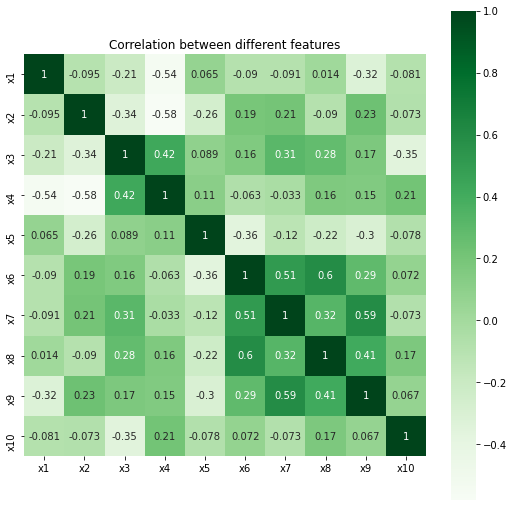

In [8]:
plt.figure(figsize=(9,9)) 
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Greens')
plt.title('Correlation between different features')
plt.show()

In [9]:
# проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [10]:
eigenvalues_sorted

[2.7497965102975996,
 2.123342470145559,
 1.392215037694421,
 1.2237191515439223,
 0.8205891395622957,
 0.6228119954494947,
 0.4610347173489643,
 0.3118351014625432,
 0.15866112512200176,
 0.13599475137319886]

In [11]:
import math

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R))

chi2_z = chi_2(scaled_data.shape[0], scaled_data.shape[1], correlation)
p_value =sts.chi2.sf(chi2_z, scaled_data.shape[1]* (scaled_data.shape[1]-1) / 2)
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости: ", p_value)
if p_value > 0.05:
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  335.4276560175807
Достигаемый уровень значимости:  4.710894446974743e-46
Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


In [12]:
#Доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], scaled_data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], scaled_data.shape[0])

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


,left_border,eig,right_border
0,2.111283,2.749797,3.941959
1,1.630294,2.123342,3.043909
2,1.068937,1.392215,1.995804
3,0.939567,1.223719,1.754258
4,0.630045,0.820589,1.176352
5,0.478193,0.622812,0.892830
6,0.353981,0.461035,0.660914
7,0.239426,0.311835,0.447030
8,0.121819,0.158661,0.227448
9,0.104416,0.135995,0.194955


In [13]:
#Проверка гипотезы о кратности собственных чисел

N = 85 # Число наблюдений
r = 2 # Число кратных корней
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 # Число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Статистика критерия:", z)
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности собственных чисел принимается")
else:
    print(f"Гипотеза о кратности собственных чисел отвергается")

Статистика критерия: 297.83885068994994
Достигаемый уровень значимости:  4.228100679137835e-65
Гипотеза о кратности собственных чисел отвергается


In [14]:
# оценка уровня информативности
pc = 3
lmbd = 0

'''for i in range(pc):
    lmbd = lmbd + eigenvalues_sorted[i]

I = lmbd * 100 / f_len'''

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))


Оценка информативности для 1 главных компонент:
I(x) = 27.498%
Оценка информативности для 2 главных компонент:
I(x) = 48.731%
Оценка информативности для 3 главных компонент:
I(x) = 62.654%
Оценка информативности для 4 главных компонент:
I(x) = 74.891%


Значение pc выбирается так, чтобы информативность была выше 70% (насколько мы поняли)

In [15]:
# Критерий Кайзера
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")

Критерий Кайзера:  4
Гипотеза о достаточности 3 главных компонент принимается


In [ ]:
eigenvalues_sorted

[2.7497965102975996,
 2.123342470145559,
 1.392215037694421,
 1.2237191515439223,
 0.8205891395622957,
 0.6228119954494947,
 0.4610347173489643,
 0.3118351014625432,
 0.15866112512200176,
 0.13599475137319886]

In [17]:
#Критерия Бартлета
pc = 3
k = len(eigenvalues_sorted) # Число компонент
dof = ((k - pc) ** 2 - k - pc - 1) / 2 # Число степеней свободы
R = np.prod(eigenvalues_sorted) / (np.prod(eigenvalues_sorted[:pc]) * ((k - np.sum(eigenvalues_sorted[:3]) / (k - pc)) ** (k - pc)))
z = - (N - (2 * k + 5) / 6 - 2 * pc / 3 ) * np.log(R) 
p_val = 2 * min(sts.chi2.cdf(z, dof), sts.chi2.sf(z, dof))
print("Статистика критерия:", z)
print("Достигаемый уровень значимости: ", p_val)
if p_val > 0.05:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")

Статистика критерия: 1711.2164063012297
Достигаемый уровень значимости:  0.0
Гипотеза о достаточности 3 главных компонент отвергается


In [18]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues))
eigenvalues_sum = eigenvalues.sum()

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted)
df = pd.DataFrame(
    zip(
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share"]
)
df

,eig,number,variance_share
0,2.749797,1,0.27
1,2.123342,2,0.21
2,1.392215,3,0.14
3,1.223719,4,0.12
4,0.820589,5,0.08
5,0.622812,6,0.06
6,0.461035,7,0.05
7,0.311835,8,0.03
8,0.158661,9,0.02
9,0.135995,10,0.01


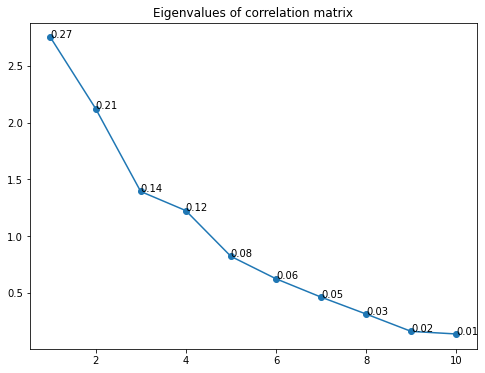

In [19]:
plt.figure(figsize=(8, 6))
plt.title('Eigenvalues of correlation matrix')
plt.plot(df['number'], df['eig'], marker='o')
ax = plt.gca()
df.apply(lambda x: ax.annotate(x['variance_share'], (x['number'], x['eig'])), axis=1)
plt.show()

In [20]:
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share']])], axis=1)
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share']
result

,eig,number,variance_share,cum_eig,cum_variance_share
0,2.749797,1,0.27,2.749797,0.27
1,2.123342,2,0.21,4.873139,0.48
2,1.392215,3,0.14,6.265354,0.62
3,1.223719,4,0.12,7.489073,0.74
4,0.820589,5,0.08,8.309662,0.82
5,0.622812,6,0.06,8.932474,0.88
6,0.461035,7,0.05,9.393509,0.93
7,0.311835,8,0.03,9.705344,0.96
8,0.158661,9,0.02,9.864005,0.98
9,0.135995,10,0.01,10.000000,0.99


In [21]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков 
vector_df = pd.DataFrame(eigenvector, columns=['Factor_' + str(i + 1) for i in range(f_len)], index=features)
vector_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
x1,0.218375,-0.270691,0.281889,0.610665,0.133824,-0.386215,-0.074702,0.094642,-0.493734,-0.035839
x2,-0.096445,-0.533961,-0.026559,-0.414165,0.057462,0.259696,0.247804,0.405435,-0.405098,-0.269653
x3,-0.251247,0.402833,0.466600,-0.007991,-0.157468,0.017754,-0.061703,0.688524,-0.007552,0.231906
x4,-0.140604,0.602511,-0.239679,-0.080308,-0.069847,-0.028784,-0.059734,-0.141286,-0.615479,-0.381135
x5,0.258637,0.270147,0.229033,-0.010678,0.747253,0.380153,0.271301,-0.080390,-0.077347,0.136398
x6,-0.446088,-0.169179,0.020651,0.277142,-0.123525,0.571744,-0.228190,-0.271781,-0.276444,0.388128
x7,-0.444983,-0.102477,0.253224,-0.081993,0.447926,-0.102540,-0.526680,-0.069410,0.201882,-0.431886
x8,-0.426218,0.040836,-0.036358,0.482617,-0.015084,0.068214,0.620976,0.025941,0.245117,-0.362192
x9,-0.461236,-0.045412,-0.077649,-0.259897,0.247580,-0.543506,0.292693,-0.154827,-0.160602,0.468502
x10,-0.042641,0.022042,-0.721329,0.254818,0.336612,0.016702,-0.226472,0.472069,0.064923,0.143205


In [26]:
# построение главных компонент
pc = 3

u = pd.DataFrame(
    data=np.array([couple_lst[i][1] for i in range(f_len)]).T,
    columns=['Factor_' + str(i + 1) for i in range(f_len)],
    index=features
)
u

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
x1,0.218375,-0.270691,0.281889,0.610665,0.133824,-0.386215,-0.074702,0.094642,-0.493734,-0.035839
x2,-0.096445,-0.533961,-0.026559,-0.414165,0.057462,0.259696,0.247804,0.405435,-0.405098,-0.269653
x3,-0.251247,0.402833,0.466600,-0.007991,-0.157468,0.017754,-0.061703,0.688524,-0.007552,0.231906
x4,-0.140604,0.602511,-0.239679,-0.080308,-0.069847,-0.028784,-0.059734,-0.141286,-0.615479,-0.381135
x5,0.258637,0.270147,0.229033,-0.010678,0.747253,0.380153,0.271301,-0.080390,-0.077347,0.136398
x6,-0.446088,-0.169179,0.020651,0.277142,-0.123525,0.571744,-0.228190,-0.271781,-0.276444,0.388128
x7,-0.444983,-0.102477,0.253224,-0.081993,0.447926,-0.102540,-0.526680,-0.069410,0.201882,-0.431886
x8,-0.426218,0.040836,-0.036358,0.482617,-0.015084,0.068214,0.620976,0.025941,0.245117,-0.362192
x9,-0.461236,-0.045412,-0.077649,-0.259897,0.247580,-0.543506,0.292693,-0.154827,-0.160602,0.468502
x10,-0.042641,0.022042,-0.721329,0.254818,0.336612,0.016702,-0.226472,0.472069,0.064923,0.143205


In [27]:
# матрица нагрузок
A = u @ np.diag(np.sqrt(eigenvalues_sorted))
A.index = features
A

,0,1,2,3,4,5,6,7,8,9
x1,0.362121,-0.394442,0.332607,0.675529,0.121226,-0.304795,-0.050722,0.052850,-0.196665,-0.013216
x2,-0.159930,-0.778072,-0.031338,-0.458157,0.052053,0.204948,0.168258,0.226404,-0.161360,-0.099441
x3,-0.416631,0.586996,0.550551,-0.008840,-0.142645,0.014011,-0.041896,0.384487,-0.003008,0.085521
x4,-0.233156,0.877961,-0.282803,-0.088838,-0.063272,-0.022716,-0.040559,-0.078897,-0.245159,-0.140553
x5,0.428885,0.393650,0.270241,-0.011812,0.676910,0.300011,0.184212,-0.044891,-0.030809,0.050300
x6,-0.739727,-0.246522,0.024367,0.306579,-0.111897,0.451211,-0.154940,-0.151769,-0.110114,0.143132
x7,-0.737893,-0.149327,0.298784,-0.090702,0.405760,-0.080923,-0.357614,-0.038760,0.080414,-0.159268
x8,-0.706776,0.059505,-0.042900,0.533880,-0.013664,0.053834,0.421640,0.014486,0.097636,-0.133567
x9,-0.764845,-0.066174,-0.091619,-0.287503,0.224274,-0.428926,0.198737,-0.086459,-0.063971,0.172772
x10,-0.070709,0.032119,-0.851112,0.281885,0.304924,0.013181,-0.153774,0.263614,0.025860,0.052810


In [29]:
# Матрица индивидуальных значений главных компонент
F = (np.linalg.inv(A.T @ A) @ A.T @ scaled_data.T).T
F.columns = ['Factor_' + str(i + 1) for i in range(f_len)]
#F = F.sort_values("Factor_1", ascending=False)
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F[:18]

,Factor_1,Factor_2,Factor_3
Субъект Российской Федерации,,,
Алтайский край,-0.170380,-0.892906,0.641201
Амурская область,-1.902920,-0.211967,1.122686
Архангельская область,-0.109872,0.102153,-0.693392
Астраханская область,-0.187147,-0.638132,-1.135738
Белгородская область,1.393155,0.860947,0.958880
Брянская область,0.612456,-0.097487,0.302352
Владимирская область,0.868258,-0.228569,0.265539
Волгоградская область,0.400720,-0.488798,-0.325188
Вологодская область,0.366078,-0.262664,0.166225


In [30]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel('classes.xlsx')
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old
Субъект Российской Федерации,,,,,
Алтайский край,-0.170380,-0.892906,0.641201,2,1
Амурская область,-1.902920,-0.211967,1.122686,1,6
Архангельская область,-0.109872,0.102153,-0.693392,4,1
Астраханская область,-0.187147,-0.638132,-1.135738,4,1
Белгородская область,1.393155,0.860947,0.958880,1,6
...,...,...,...,...,...
Чеченская Республика,1.885998,-0.352833,-0.368823,3,3
Чувашская Республика,0.568559,-0.771977,-1.423343,6,5
Чукотский автономный округ,-0.694218,3.296513,-1.615899,6,5


In [31]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

In [32]:
F.iloc[:, :pc]

,Factor_1,Factor_2,Factor_3
Субъект Российской Федерации,,,
Алтайский край,-0.170380,-0.892906,0.641201
Амурская область,-1.902920,-0.211967,1.122686
Архангельская область,-0.109872,0.102153,-0.693392
Астраханская область,-0.187147,-0.638132,-1.135738
Белгородская область,1.393155,0.860947,0.958880
...,...,...,...
Чеченская Республика,1.885998,-0.352833,-0.368823
Чувашская Республика,0.568559,-0.771977,-1.423343
Чукотский автономный округ,-0.694218,3.296513,-1.615899


Text(0.5, 1.0, 'ward method')

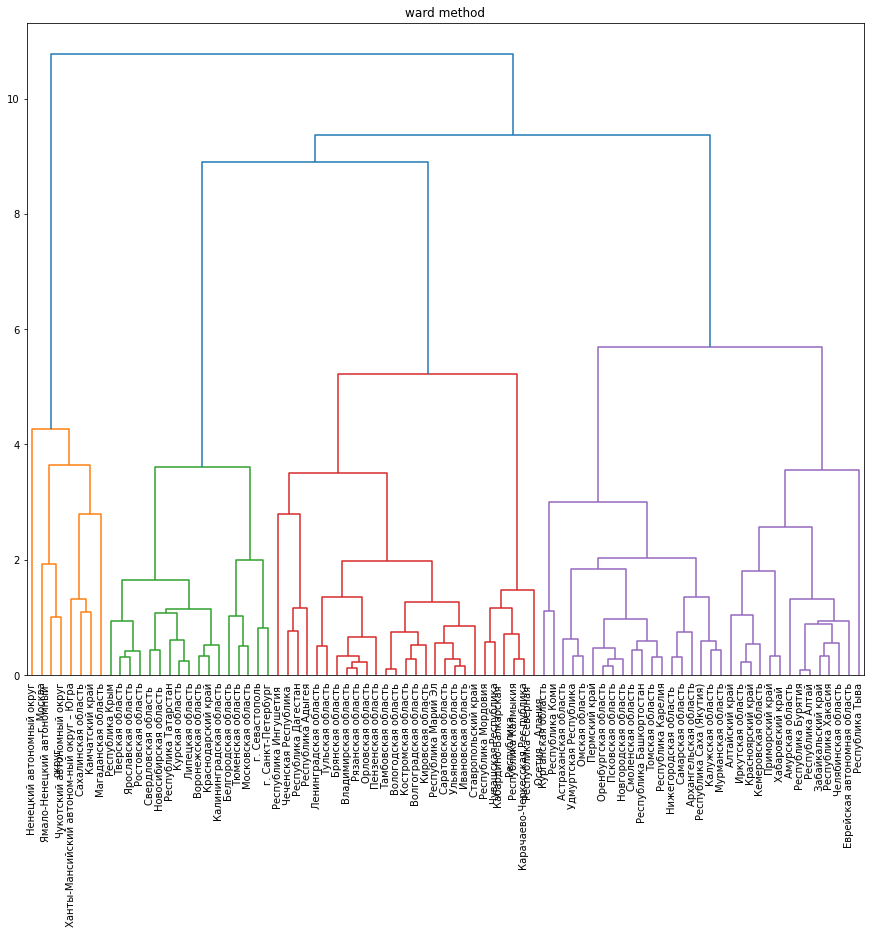

In [33]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

In [34]:
n_clusters = 6
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old,ward_new,kmeans_new
Субъект Российской Федерации,,,,,,,
Алтайский край,-0.170380,-0.892906,0.641201,2,1,2,0
Амурская область,-1.902920,-0.211967,1.122686,1,6,2,2
Архангельская область,-0.109872,0.102153,-0.693392,4,1,4,0
Астраханская область,-0.187147,-0.638132,-1.135738,4,1,4,1
Белгородская область,1.393155,0.860947,0.958880,1,6,1,4
...,...,...,...,...,...,...,...
Чеченская Республика,1.885998,-0.352833,-0.368823,3,3,3,5
Чувашская Республика,0.568559,-0.771977,-1.423343,6,5,5,1
Чукотский автономный округ,-0.694218,3.296513,-1.615899,6,5,0,3


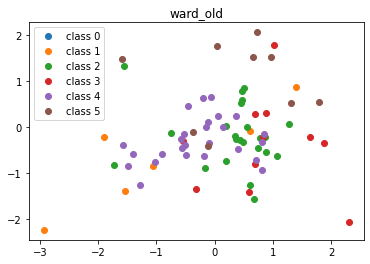

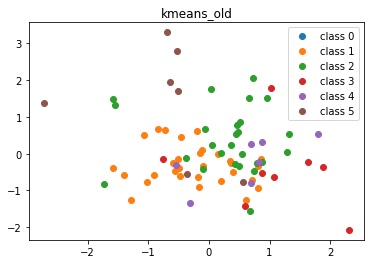

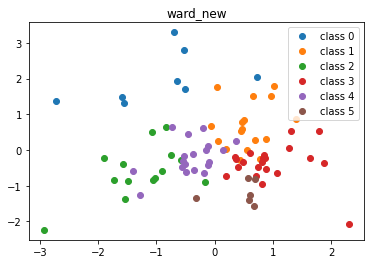

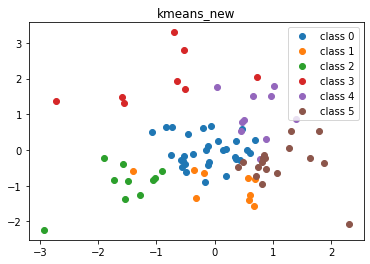

In [35]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
    plt.legend()
    plt.show()


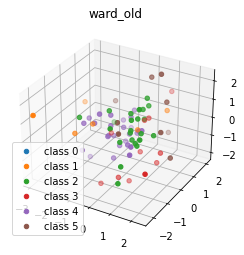

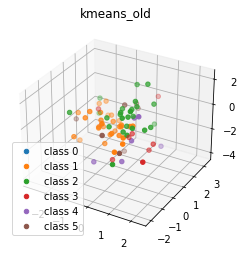

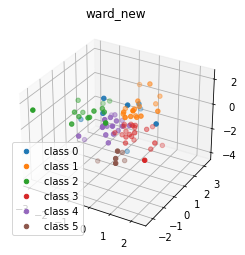

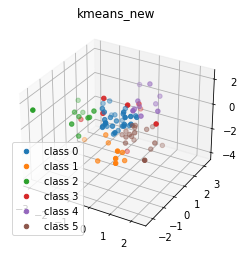

In [36]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [37]:
# выгрузка в файл
F.to_excel('Lab3_python.xlsx')